### Fraud Analytics

In [1]:
import urllib
import pandas as pd
from sqlalchemy import create_engine
import pymssql

In [2]:
# Load fraud data


fraud_cases = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Fraud_python.xlsx")

fraud_cases.head(2)

,Date,SAS VIYA Ref No,Account_number,Account name,Holding Branch/Segment,Event Type (Type of External Inv,Description,No._x000D_\nof_x000D_\nTxns,Rand_x000D_\nValue Involved,Recovered value,...,RSK_CAT_CDE,RSK_RSN_CDE,CUST_AGE,CUST_TYPE,KYC_IND,CONSENT_IND,HIGH_EDU_LVL,EMPLOYER_NAME,EMPLOYMENT_IND,SELF_EMPLOYMENT_IND
0,2024-09-23 07:58:00.905,2024-2828484,55100013065,SELMA PINEAS,Retail,Banking APP (O000FT006),Impersonator Scam,6.0,20000,10506.79,...,0.0,642.0,58.0,1.0,Y,Y,DIP,OLD MUTUAL-SALES ADVISOR,1.0,0.0
1,2024-08-01 00:00:00.000,2024-2768252,55100019047,EUGENE HUGO,Retail,Account Takeover - Banking APP (O000FT135),Impersonator Scam,3.0,10000,-,...,0.0,641.0,55.0,1.0,Y,Y,G12,SHORELINE CONS/MANAG,1.0,0.0


In [3]:
# Load transactions data


jan = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Jan_trans.xlsx")
feb = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Feb_trans.xlsx")
mar = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Mar_trans.xlsx")
apr = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Apr_trans.xlsx")
may = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\May_trans.xlsx")
jun = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Jun_trans.xlsx")
jul = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Jul_trans.xlsx")
aug = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Aug_trans.xlsx")
sep = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Sep_trans.xlsx")
oct = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Oct_trans.xlsx")
nov = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Nov_trans.xlsx")
dec = pd.read_excel(r"C:\Users\f5648327\OneDrive - FRG\Documents\PROJECTS\FRAUD\Transactions\Dec_trans.xlsx")


In [33]:
combine = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

data = pd.concat(combine, ignore_index=True)

data.tail(5)

,ETL_LOAD_DT,POST_DATE,EFF_DATE,SYS_DATE,PROD_CDE,SUB_PROD_CDE,ACCT_NO_A,TRNS_CDE,INP_BRN_CDE,RMT_BRN_CDE,...,BTCH_NO,TRNS_CDE_DESC,TRNS_SRC_DESC,CHANNEL_CDE,SUB_CHANNEL_CDE,CHANNEL_NAME,SUB_CHANNEL_NAME,TRNS_SRC_DESC_TYPE,TRNS_SRC_TYPE,FRAUD_MONTH
856536,2025-01-01 02:59:13,2024-12-31,2024-12-31,2024-12-31,DDA,6A,62265289134,5040,566,1419,...,NaN,INTERNET PMT,VODS - BANKIT,ONL,ONB,FNB ONLINE,ONLINE BANKING,FNB ONLINE INTERNET BANKING,FNB ONLINE INTERNET BANKING,1
856537,2025-01-01 02:59:13,2024-12-31,2024-12-31,2024-12-31,DDA,6A,62265289134,5040,566,1419,...,NaN,INTERNET PMT,VODS - BANKIT,ONL,ONB,FNB ONLINE,ONLINE BANKING,FNB ONLINE INTERNET BANKING,FNB ONLINE INTERNET BANKING,1
856538,2025-01-01 02:59:13,2024-12-31,2024-12-31,2024-12-31,DDA,6A,62265289134,7851,1677,1419,...,NaN,FNB APP PAYMENT TO,UNKNOWN SOURCE CODE,NaN,NaN,NaN,NaN,NaN,APP,1
856539,2025-01-01 02:59:13,2024-12-31,2024-12-31,2024-12-31,DDA,6A,62265289134,8741,4162,1419,...,NaN,NRTC CREDIT,UNKNOWN SOURCE CODE,NaN,NaN,NaN,NaN,NaN,NaN,1
856540,2025-01-01 02:59:13,2024-12-31,2024-12-31,2024-12-31,DDA,CA,64282886646,1118,568,568,...,NaN,INT ON CREDIT BALANCE,DDA INTERNALLY GENERATED,BRN,BRP,BRANCH,BRANCH PROCESSING,BRANCH - SYSTEM (DDA),BRANCH - SYSTEM (DDA),1


In [6]:
print(data.columns)


Index(['ETL_LOAD_DT', 'POST_DATE', 'EFF_DATE', 'SYS_DATE', 'PROD_CDE',
       'SUB_PROD_CDE', 'ACCT_NO_A', 'TRNS_CDE', 'INP_BRN_CDE', 'RMT_BRN_CDE',
       'TRNS_AMT_A', 'TRNS_SRC_CDE', 'REF_NO', 'CARD_NO_A', 'TXN_TIME',
       'TRNS_TYPE_CUST', 'TRNS_DESC', 'TRACE_ID', 'DEVICE', 'CARD_NO_B',
       'TRNS_AMT_B', 'SRCE_CURR_CD', 'TVR_CHIP_DATA_MISS', 'TVR_CARD_ON_EXCP',
       'TVR_ONLNE_PIN_ENT', 'TVR_OFFLNE_PIN_EXCED', 'TVR_ISS_AUTH_FLD',
       'FALLBACK_IND', 'ONLNE_RSN_CDE', 'ACCT_NO_B', 'CASHBACK_AMT', 'OWN_BRN',
       'IDS_TRNS_CDE', 'DEST_CRNCY_CDE', 'TERM_ID', 'POS_TERM_CAP',
       'POS_ENTRY_MODE', 'MRCH_REG_CDE', 'CVR_PIN_VER_RES', 'CVR_UNAB_ONLNE',
       'CVR_APPL_BLKD', 'TVR_PIN_PRES', 'MRCH_NME', 'MRCH_CITY', 'MRCH_CNTRY',
       'REIMB_ATTRIB', 'CARD_SUB_PROD_CDE', 'CARD_TRNS_CDE', 'CARD_RSN_CDE',
       'CAT_CDE', 'AUTH_CDE', 'CRNCY_CDE', 'TRNS_DATE', 'PROC_DATE',
       'FORMAT_CDE', 'BIN_NO', 'CAPT_JUL_DATE', 'BTCH_NO', 'TRNS_CDE_DESC',
       'TRNS_SRC_DESC', 'CHA

In [34]:
# Ensure POST_DATE is in datetime format
data['POST_DATE'] = pd.to_datetime(data['POST_DATE'])

# Sort data by POST_DATE
data_sorted = data.sort_values(by='POST_DATE')

# Filter for rows where FRAUD_MONTH is 1
fraud_data = data_sorted[data_sorted['FRAUD_MONTH'] == 1]

# Select the first 5 unique CARD_NO_A
first_5_cards = fraud_data['CARD_NO_A'].drop_duplicates().head(5)

# Get the rows corresponding to these first 5 CARD_NO_A
first_5_result = fraud_data[fraud_data['CARD_NO_A'].isin(first_5_cards)]

# Display result
print(first_5_result)

              ETL_LOAD_DT  POST_DATE   EFF_DATE   SYS_DATE PROD_CDE  \
33035 2024-01-03 03:16:17 2024-01-02 2024-01-02 2023-12-30      DDA   
33036 2024-01-03 03:16:17 2024-01-02 2024-01-02 2023-12-30      DDA   
33037 2024-01-03 03:16:17 2024-01-02 2024-01-02 2023-12-30      DDA   
33038 2024-01-03 03:16:17 2024-01-02 2024-01-02 2023-12-30      DDA   
33039 2024-01-03 03:16:17 2024-01-02 2024-01-02 2023-12-30      DDA   
...                   ...        ...        ...        ...      ...   
35285 2024-01-20 01:04:55 2024-01-19 2024-01-19 2024-01-17      DDA   
35286 2024-01-20 01:04:55 2024-01-19 2024-01-19 2024-01-17      DDA   
35287 2024-01-20 01:04:55 2024-01-19 2024-01-19 2024-01-17      DDA   
35353 2024-01-20 01:04:55 2024-01-19 2024-01-19 2024-01-19      DDA   
35438 2024-01-21 14:24:10 2024-01-20 2024-01-20 2024-01-18      DDA   

      SUB_PROD_CDE    ACCT_NO_A  TRNS_CDE  INP_BRN_CDE  RMT_BRN_CDE  ...  \
33035           06  62251492923      5250          581           12  ..

In [35]:
import os

# Define the path to your desktop
desktop_path = os.path.join(os.path.expanduser("~"), r"C:\Users\f5648327\OneDrive - FRG\Desktop", "first_5.xlsx")

# Export the filtered data to an Excel file on your desktop
first_5_result.to_excel(desktop_path, index=True)

print(f"File saved to: {desktop_path}")


File saved to: C:\Users\f5648327\OneDrive - FRG\Desktop\first_5.xlsx


### Anomaly detection code 

In [7]:
# File system manangement
import time, psutil, os, gc

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Train-test split
from sklearn.model_selection import train_test_split

# Progress bar for loop
from tqdm.contrib import itertools

In [ ]:
# Train-Validation-Test Split

In [8]:
# Splitting the data by target class
data_0, data_1 = data[data['FRAUD_MONTH'] == 0], data[data['FRAUD_MONTH'] == 1]

# Feature-target split
X_0, y_0 = data_0.drop('FRAUD_MONTH', axis = 1), data_0['FRAUD_MONTH']
X_1, y_1 = data_1.drop('FRAUD_MONTH', axis = 1), data_1['FRAUD_MONTH']

# Splitting the authentic class and constructing the training set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state = 40)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val_1, data_test_1 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Splitting the fraudulent class
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size = 0.5, random_state = 40)
data_val_2, data_test_2 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Merging data to construct the validation set and the test set
data_val, data_test = pd.concat([data_val_1, data_val_2], axis = 0), pd.concat([data_test_1, data_test_2], axis = 0)
X_val, y_val = data_val.drop('FRAUD_MONTH', axis = 1), data_val['FRAUD_MONTH']
X_test, y_test = data_test.drop('FRAUD_MONTH', axis = 1), data_test['FRAUD_MONTH']


In [9]:
# Distribution of authentic and fraudulent transactions over training, validation and test set
labels = ['Train', 'Validation', 'Test']
values_0 = [len(y_train[y_train == 0]), len(y_val[y_val == 0]), len(y_test[y_test == 0])]
values_1 = [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'domain'}, {'type': 'domain'}]])
fig.add_trace(go.Pie(values = values_0, labels = labels, hole = 0.5, textinfo = 'percent', title = "Authentic"),
              row = 1, col = 1)
fig.add_trace(go.Pie(values = values_1, labels = labels, hole = 0.5, textinfo = 'percent', title = "Fraudulent"),
              row = 1, col = 2)
text_title = "Distribution of authentic and fraudulent transactions over training, validation and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [10]:
# Setting the number of bins
bins_train = math.floor(len(X_train)**(1/3))

In [64]:
# FEATURE ENGINEERING

In [11]:
# TIME 

# Decomposing time

# Function to convert time to seconds since midnight
def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second if pd.notnull(t) else None

# Apply conversion on all datasets
for df in [X_train, X_val, X_test]:
    df['TXN_TIME_SEC'] = df['TXN_TIME'].apply(time_to_seconds)  # Convert TXN_TIME to seconds
    df['Hour'] = df['TXN_TIME_SEC'] // 3600
    df['Minute'] = (df['TXN_TIME_SEC'] % 3600) // 60
    df['Second'] = df['TXN_TIME_SEC'] % 60

# Check the results
X_train[['TXN_TIME', 'TXN_TIME_SEC', 'Hour', 'Minute', 'Second']].head()


,TXN_TIME,TXN_TIME_SEC,Hour,Minute,Second
555549,21:22:53,76973,21,22,53
411083,06:14:07,22447,6,14,7
849783,11:04:06,39846,11,4,6
131799,00:00:00,0,0,0,0
681531,04:02:19,14539,4,2,19


In [12]:
if 'Time' not in X_train.columns:
    X_train['Time'] = X_train['TXN_TIME'].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)


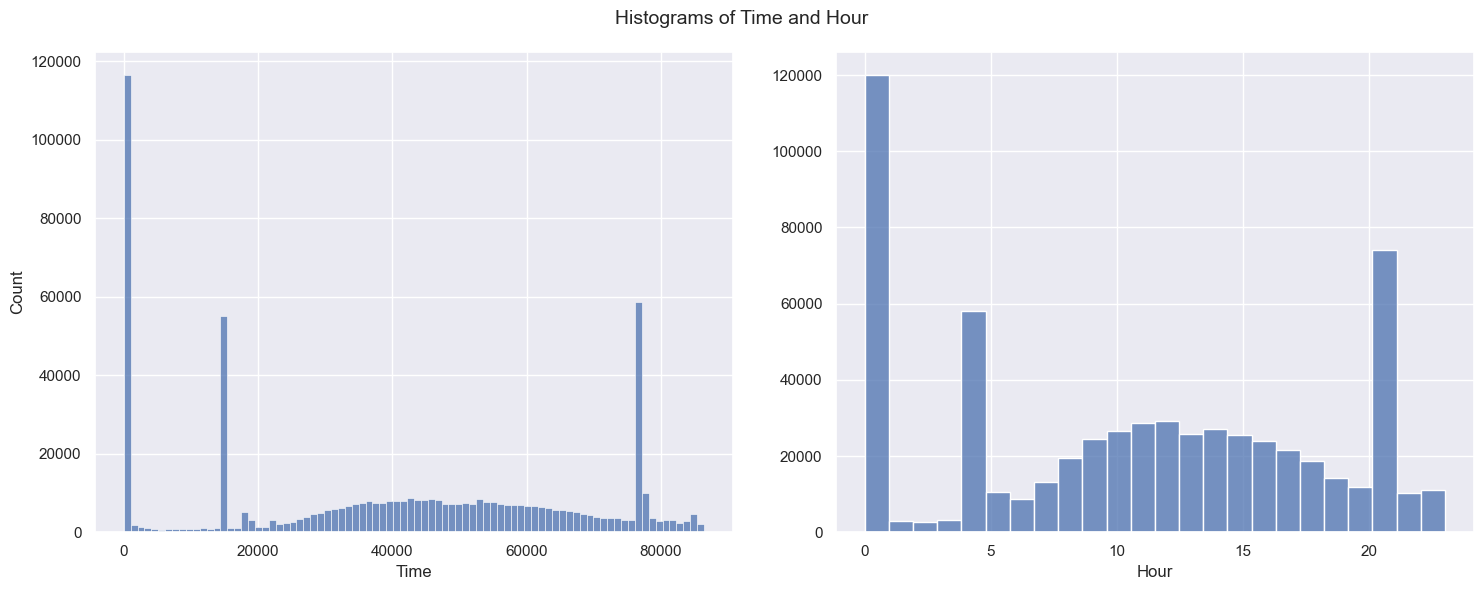

In [13]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = X_train, x = 'Time', bins = bins_train, ax = ax[0])
sns.histplot(data = X_train, x = 'Hour', bins = 24, ax = ax[1])
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Time and Hour", size = 14)
plt.tight_layout()
plt.show()

In [14]:
# AMOUNT 

# Transformation of 'Amount'
for df in [X_train, X_val, X_test]:
    df['Amount_transformed'] = np.log10(df['TRNS_AMT_A'] + 0.001)

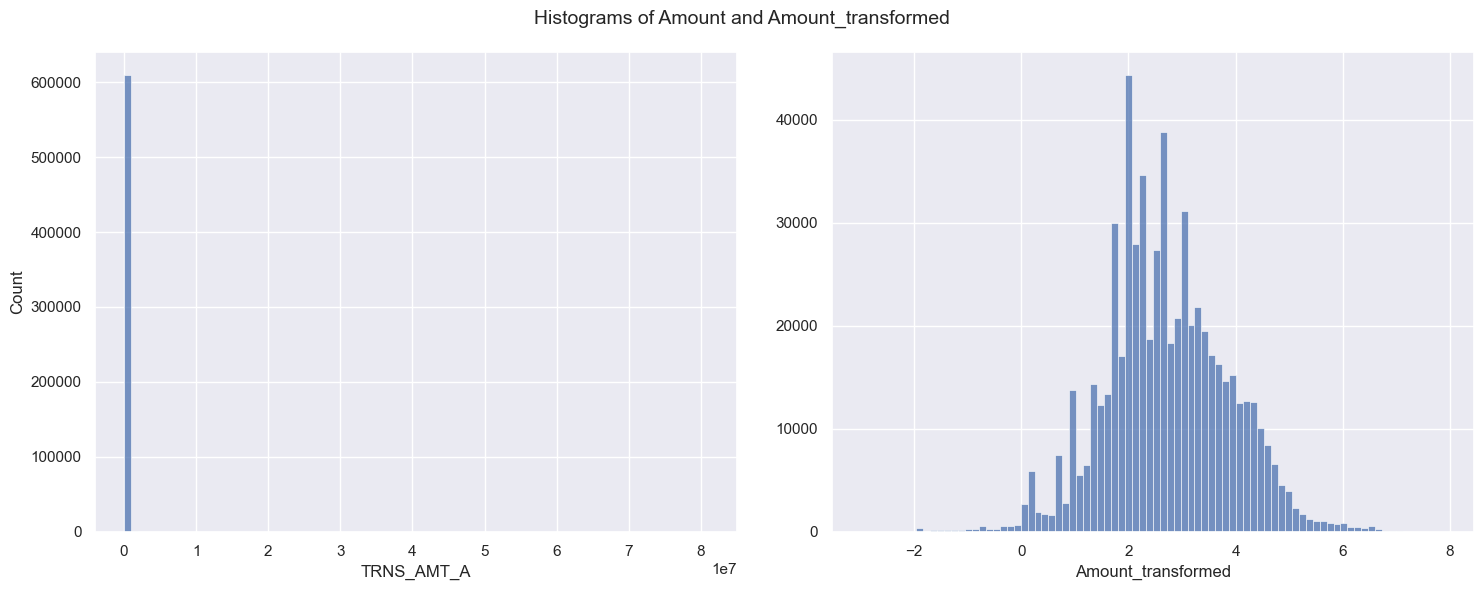

In [15]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = X_train, x = 'TRNS_AMT_A', bins = bins_train, ax = ax[0])
sns.histplot(data = X_train, x = 'Amount_transformed', bins = bins_train, ax = ax[1])
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Amount and Amount_transformed", size = 14)
plt.tight_layout()
plt.show()

In [16]:
for df_name, df in zip(["X_train", "X_val", "X_test"], [X_train, X_val, X_test]):
    print(f"Columns in {df_name}: {df.columns}")


Columns in X_train: Index(['ETL_LOAD_DT', 'POST_DATE', 'EFF_DATE', 'SYS_DATE', 'PROD_CDE',
       'SUB_PROD_CDE', 'ACCT_NO_A', 'TRNS_CDE', 'INP_BRN_CDE', 'RMT_BRN_CDE',
       'TRNS_AMT_A', 'TRNS_SRC_CDE', 'REF_NO', 'CARD_NO_A', 'TXN_TIME',
       'TRNS_TYPE_CUST', 'TRNS_DESC', 'TRACE_ID', 'DEVICE', 'CARD_NO_B',
       'TRNS_AMT_B', 'SRCE_CURR_CD', 'TVR_CHIP_DATA_MISS', 'TVR_CARD_ON_EXCP',
       'TVR_ONLNE_PIN_ENT', 'TVR_OFFLNE_PIN_EXCED', 'TVR_ISS_AUTH_FLD',
       'FALLBACK_IND', 'ONLNE_RSN_CDE', 'ACCT_NO_B', 'CASHBACK_AMT', 'OWN_BRN',
       'IDS_TRNS_CDE', 'DEST_CRNCY_CDE', 'TERM_ID', 'POS_TERM_CAP',
       'POS_ENTRY_MODE', 'MRCH_REG_CDE', 'CVR_PIN_VER_RES', 'CVR_UNAB_ONLNE',
       'CVR_APPL_BLKD', 'TVR_PIN_PRES', 'MRCH_NME', 'MRCH_CITY', 'MRCH_CNTRY',
       'REIMB_ATTRIB', 'CARD_SUB_PROD_CDE', 'CARD_TRNS_CDE', 'CARD_RSN_CDE',
       'CAT_CDE', 'AUTH_CDE', 'CRNCY_CDE', 'TRNS_DATE', 'PROC_DATE',
       'FORMAT_CDE', 'BIN_NO', 'CAPT_JUL_DATE', 'BTCH_NO', 'TRNS_CDE_DESC',
       '

In [ ]:
# FEATURE SELECTION

In [17]:
print(X_val.dtypes)

ETL_LOAD_DT           datetime64[ns]
POST_DATE             datetime64[ns]
EFF_DATE              datetime64[ns]
SYS_DATE              datetime64[ns]
PROD_CDE                      object
                           ...      
TXN_TIME_SEC                   int64
Hour                           int64
Minute                         int64
Second                         int64
Amount_transformed           float64
Length: 71, dtype: object


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [19]:
# Convert categorical columns to numerical encoding
X_val_encoded = X_val.copy()

# Use ordinal encoding for categorical columns
cat_cols = X_val.select_dtypes(include=['object']).columns
for col in cat_cols:
    X_val_encoded[col] = X_val_encoded[col].astype('category').cat.codes

# Merge encoded X_val with y_val
data_val = pd.concat([X_val_encoded, y_val], axis=1)

# Split data into fraud and non-fraud groups
data_val_0 = data_val[data_val['FRAUD_MONTH'] == 0]
data_val_1 = data_val[data_val['FRAUD_MONTH'] == 1]

# Get all columns (now all are numeric)
cols = list(X_val_encoded.columns)  
ncols = 3
nrows = math.ceil(len(cols) / ncols)

C:\Users\f5648327\AppData\Local\Temp\ipykernel_23288\1258541399.py:7: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\f5648327\AppData\Local\Temp\ipykernel_23288\1258541399.py:8: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\f5648327\AppData\Local\Temp\ipykernel_23288\1258541399.py:7: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\f5648327\AppData\Local\Temp\ipykernel_23288\1258541399.py:8: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

No artists with labels found to put in legend.  Note that artists whose label start with an

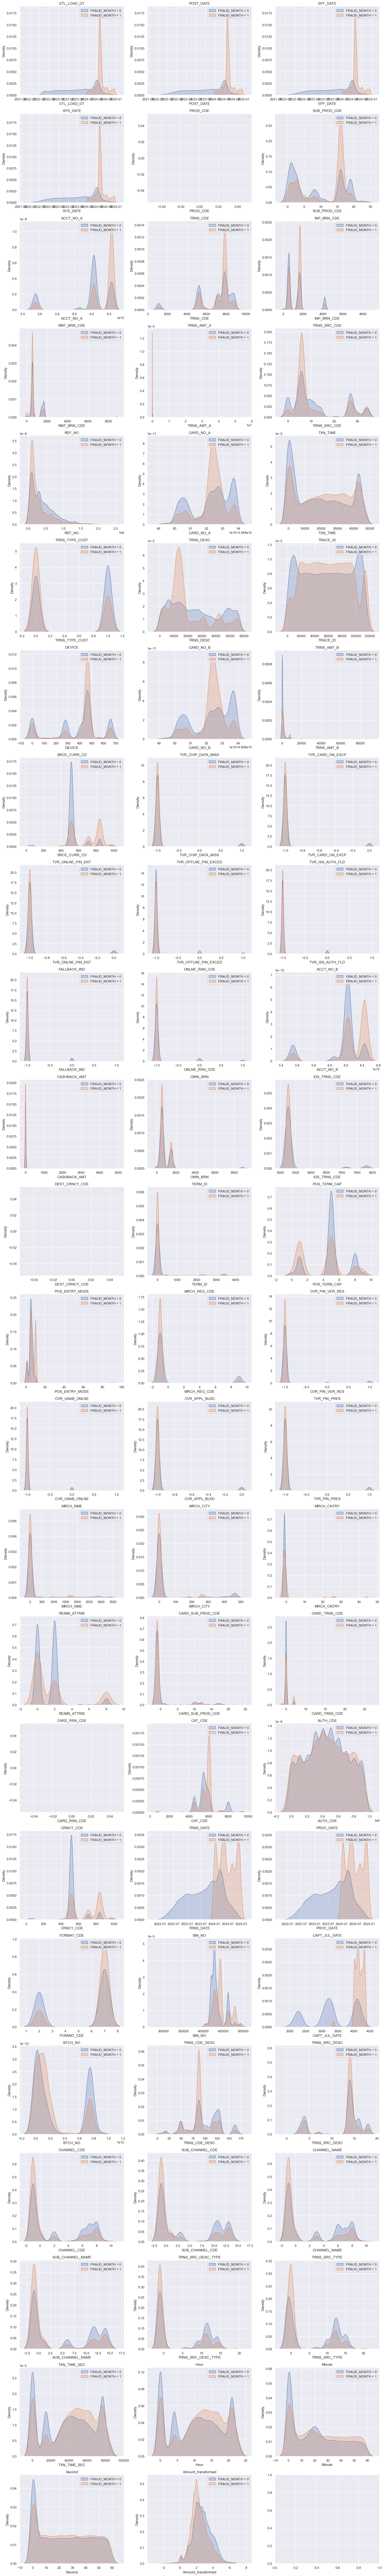

In [20]:
# Create subplots
fig, ax = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows))
ax = ax.flatten()

# Plot KDE for each feature
for i, col in enumerate(cols):
    sns.kdeplot(data_val_0[col], ax=ax[i], label='FRAUD_MONTH = 0', fill=True)
    sns.kdeplot(data_val_1[col], ax=ax[i], label='FRAUD_MONTH = 1', fill=True)
    ax[i].set_title(col)
    ax[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Exploring alerting features 

##### Transaction Descriptions

In [23]:
# Combine transaction descriptions with fraud labels
data_val_desc = pd.concat([X_val[['TRNS_DESC']], y_val], axis=1)

# Count total occurrences and fraud occurrences per transaction description
fraud_counts_desc = data_val_desc.groupby("TRNS_DESC")["FRAUD_MONTH"].agg(['count', 'sum'])

# Rename columns
fraud_counts_desc.columns = ['Total_Transactions', 'Fraud_Transactions']

# Compute fraud percentage
fraud_counts_desc['Fraud_Percentage'] = (fraud_counts_desc['Fraud_Transactions'] / fraud_counts_desc['Total_Transactions']) * 100

# Sort by highest fraud percentage
fraud_counts_sorted_desc = fraud_counts_desc.sort_values(by='Fraud_Percentage', ascending=False)

# Display top descriptions with highest fraud association
print(fraud_counts_sorted_desc.head(10))  


                                                 Total_Transactions  \
TRNS_DESC                                                             
zonhoberto  wedding zonhoberto  wedding                           1   
PURCH SPAR AUSSENKEHR     4848529001583489 7427                   1   
FNB APP TRANSFER FROM MNN                                         1   
FNB APP TRANSFER FROM MNCGHS                                      1   
FNB APP TRANSFER FROM MLODX                                       1   
PURCH SPAR EXPRESS EAST EN4848528005233638 7427                   1   
FNB APP TRANSFER FROM MIGUEL                                      1   
PURCH SPAR EXPRESS WINDHOE4848505002688964 7427                   1   
PURCH SPAR EXPRESS WINDHOE4848524101908363 7427                   1   
FNB APP TRANSFER FROM MATHIC                                      2   

                                                 Fraud_Transactions  \
TRNS_DESC                                                             
zonho

In [24]:
import os

# Define the path to your desktop
desktop_path = os.path.join(os.path.expanduser("~"), r"C:\Users\f5648327\OneDrive - FRG\Desktop", "fraud_trans_desc.xlsx")

# Export the filtered data to an Excel file on your desktop
fraud_counts_sorted_desc.to_excel(desktop_path, index=True)

print(f"File saved to: {desktop_path}")


File saved to: C:\Users\f5648327\OneDrive - FRG\Desktop\fraud_trans_desc.xlsx


##### Merchants

In [25]:

# Combine transaction descriptions with fraud labels
data_val_merch = pd.concat([X_val[['MRCH_NME']], y_val], axis=1)

# Count total occurrences and fraud occurrences per transaction description
fraud_counts_merch = data_val_merch.groupby("MRCH_NME")["FRAUD_MONTH"].agg(['count', 'sum'])

# Rename columns
fraud_counts_merch.columns = ['Total_Transactions', 'Fraud_Transactions']

# Compute fraud percentage
fraud_counts_merch['Fraud_Percentage'] = (fraud_counts_merch['Fraud_Transactions'] / fraud_counts_merch['Total_Transactions']) * 100

# Filter for fraud_percentage >= 50
fraud_counts_filtered_merch = fraud_counts_merch[fraud_counts_merch['Fraud_Percentage'] >= 50]

# Sort by highest fraud percentage
fraud_counts_sorted_merch = fraud_counts_filtered_merch.sort_values(by='Fraud_Percentage', ascending=False)

# Display the head of the filtered and sorted dataset
print(fraud_counts_sorted_merch.head())


                        Total_Transactions  Fraud_Transactions  \
MRCH_NME                                                         
*065 HIDE-OUT                            2                   2   
MTC Walvis Bay                           1                   1   
OKAMUKUKU TYRES CC ELY                   1                   1   
OK LIQUOR KHOMASRAND -                   1                   1   
OK EXPRESS SWAKOPMUD                     1                   1   

                        Fraud_Percentage  
MRCH_NME                                  
*065 HIDE-OUT                      100.0  
MTC Walvis Bay                     100.0  
OKAMUKUKU TYRES CC ELY             100.0  
OK LIQUOR KHOMASRAND -             100.0  
OK EXPRESS SWAKOPMUD               100.0  


In [26]:
# Merge with df to get additional details
fraud_details_merch = fraud_counts_sorted_merch.merge(df[['MRCH_NME', 'MRCH_REG_CDE', 'MRCH_CITY', 'MRCH_CNTRY']], 
                                          on='MRCH_NME', 
                                          how='left')

# Display the updated dataframe with merchant details
print(fraud_details_merch.head())


                 MRCH_NME  Total_Transactions  Fraud_Transactions  \
0           *065 HIDE-OUT                   2                   2   
1          MTC Walvis Bay                   1                   1   
2  OKAMUKUKU TYRES CC ELY                   1                   1   
3  OK LIQUOR KHOMASRAND -                   1                   1   
4  OK LIQUOR KHOMASRAND -                   1                   1   

   Fraud_Percentage MRCH_REG_CDE MRCH_CITY MRCH_CNTRY  
0             100.0          NaN       NaN        NaN  
1             100.0          NaN       NaN        NaN  
2             100.0           ZA  ELYMBALA        NaN  
3             100.0           ZA   NAMIBIA        NaN  
4             100.0           ZA   NAMIBIA        NaN  


In [27]:
# Remove duplicate rows to keep distinct details
fraud_merch_final = fraud_details_merch.drop_duplicates()

In [28]:
import os

# Define the path to your desktop
desktop_path = os.path.join(os.path.expanduser("~"), r"C:\Users\f5648327\OneDrive - FRG\Desktop", "fraud_merch_final.xlsx")

# Export the filtered data to an Excel file on your desktop
fraud_merch_final.to_excel(desktop_path, index=True)

print(f"File saved to: {desktop_path}")


File saved to: C:\Users\f5648327\OneDrive - FRG\Desktop\fraud_merch_final.xlsx


##### Account numbers

In [29]:

# Combine transaction descriptions with fraud labels
data_val_acct = pd.concat([X_val[['ACCT_NO_A']], y_val], axis=1)

# Count total occurrences and fraud occurrences per transaction description
fraud_counts_acct = data_val_acct.groupby("ACCT_NO_A")["FRAUD_MONTH"].agg(['count', 'sum'])

# Rename columns
fraud_counts_acct.columns = ['Total_Transactions', 'Fraud_Transactions']

# Compute fraud percentage
fraud_counts_acct['Fraud_Percentage'] = (fraud_counts_acct['Fraud_Transactions'] / fraud_counts_acct['Total_Transactions']) * 100

# Filter for fraud_percentage >= 50
fraud_counts_filtered_acct = fraud_counts_acct[fraud_counts_acct['Fraud_Percentage'] >= 50]

# Sort by highest fraud percentage
fraud_counts_sorted_acct = fraud_counts_filtered_acct.sort_values(by='Fraud_Percentage', ascending=False)

# Display the head of the filtered and sorted dataset
print(fraud_counts_sorted_acct.head())


             Total_Transactions  Fraud_Transactions  Fraud_Percentage
ACCT_NO_A                                                            
64286403321                   8                   8             100.0
64284325874                  74                  74             100.0
64284337556                  33                  33             100.0
64284346052                   6                   6             100.0
64283235660                   5                   5             100.0


In [30]:
# Define the path to your desktop
desktop_path = os.path.join(os.path.expanduser("~"), r"C:\Users\f5648327\OneDrive - FRG\Desktop", "fraud_accounts.xlsx")

# Export the filtered data to an Excel file on your desktop
fraud_counts_sorted_acct.to_excel(desktop_path, index=True)

print(f"File saved to: {desktop_path}")


File saved to: C:\Users\f5648327\OneDrive - FRG\Desktop\fraud_accounts.xlsx


##### Cards

In [31]:

# Combine transaction descriptions with fraud labels
data_val_cards = pd.concat([X_val[['CARD_NO_B']], y_val], axis=1)

# Count total occurrences and fraud occurrences per transaction description
fraud_counts_cards = data_val_cards.groupby("CARD_NO_B")["FRAUD_MONTH"].agg(['count', 'sum'])

# Rename columns
fraud_counts_cards.columns = ['Total_Transactions', 'Fraud_Transactions']

# Compute fraud percentage
fraud_counts_cards['Fraud_Percentage'] = (fraud_counts_cards['Fraud_Transactions'] / fraud_counts_cards['Total_Transactions']) * 100

# Filter for fraud_percentage >= 50
fraud_counts_filtered_cards = fraud_counts_cards[fraud_counts_cards['Fraud_Percentage'] >= 50]

# Sort by highest fraud percentage
fraud_counts_sorted_cards = fraud_counts_filtered_cards.sort_values(by='Fraud_Percentage', ascending=False)

# Display the head of the filtered and sorted dataset
print(fraud_counts_sorted_cards.head())


              Total_Transactions  Fraud_Transactions  Fraud_Percentage
CARD_NO_B                                                             
4.848497e+15                   1                   1             100.0
4.848527e+15                   9                   9             100.0
4.848525e+15                   9                   9             100.0
4.848525e+15                  17                  17             100.0
4.848525e+15                  69                  69             100.0


In [32]:
# Define the path to your desktop
desktop_path = os.path.join(os.path.expanduser("~"), r"C:\Users\f5648327\OneDrive - FRG\Desktop", "fraud_cards.xlsx")

# Export the filtered data to an Excel file on your desktop
fraud_counts_sorted_cards.to_excel(desktop_path, index=True)

print(f"File saved to: {desktop_path}")


File saved to: C:\Users\f5648327\OneDrive - FRG\Desktop\fraud_cards.xlsx


In [74]:
# Feature selection
cols = ["TRNS_DESC", "DEVICE", "TRNS_SRC_CDE", "TRNS_AMT"]
X_train_fs, X_val_fs, X_test_fs = X_train[cols], X_val[cols], X_test[cols]
X_train_fs.head()

,TRNS_DESC,DEVICE,TRNS_SRC_CDE,TRNS_AMT
151739,SEND 264815912904 SEND 264815912904,01677301,1SA,1000.0
71909,FNB APP PREPAID AIRTIME 264816395922,DD669S08,1SA,65.0
27086,SMART-AP PREPAID AIRTIME 264813457167,01677300,1SA,20.0
793361,TRANSFER FROM 0000076001378085,IPHVODS,1CP,200.0
470184,FNB APP PAYMENT FROM Bruna1,01677301,1SA,90.0


In [ ]:
# IMPLEMENTING ANOMALY DETECTION

In [75]:
# Normal pdf
def normal_density(x, mu, sigma):
    """
    Computes univariate normal probability density function (pdf) with mean mu, standard deviation sigma
    Args:
      x (scalar)    : input observation
      mu (scalar)   : mean
      sigma (scalar): standard deviation (> 0)
    Returns:
      f (scalar): value of the univariate normal pdf
    """
    assert sigma > 0, "Standard deviation must be positive"
    f = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (1 / 2) * ((x - mu) / sigma)**2)
    return f

In [76]:
# Product of normal pdfs
def normal_product(x_vec, mu_vec, sigma_vec):
    """
    Computes product of univariate normal densities
    Args:
      x_vec (array_like, shape (n,))    : vector of input observations
      mu_vec (array_like, shape (n,))   : vector of means
      sigma_vec (array_like, shape (n,)): vector of standard deviations (> 0)
    Returns:
      f (scalar): product of univariate normal densities
    """
    assert min(sigma_vec) > 0, "Standard deviation must be positive"
    assert len(mu_vec) == len(x_vec), "Length of mean vector does not match length of input vector"
    assert len(sigma_vec) == len(x_vec), "Length of standard deviation vector does not match length of input vector"
    f = 1
    for i in range(len(x_vec)):
        f = f * normal_density(x_vec[i], mu_vec[i], sigma_vec[i])
    return f

In [77]:
# Model fitting
mu_train, sigma_train = X_train_fs.mean().values, X_train_fs.std().values

C:\Users\f5648327\AppData\Local\Temp\ipykernel_1688\3483866888.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\f5648327\AppData\Local\Temp\ipykernel_1688\3483866888.py:2: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [78]:
# Function to predict anomaly based on probability density threshold
def model_normal(X, epsilon):
    """
    Anomaly detection model
    Args:
      X (DataFrame, shape (m, n)): DataFrame of features
      epsilon (scalar)           : threshold density value (> 0)
    Returns:
      y (array_like, shape (m,)): predicted class labels
    """
    y = []
    for i in X.index:
        prob_density = normal_product(X.loc[i].tolist(), mu_train, sigma_train)
        y.append((prob_density < epsilon).astype(int))
    return y

In [ ]:
# THRESHOLD TUNING ON VALIDATION SET

In [79]:
# Function to compute confusion matrix
def conf_mat(y_test, y_pred):
    """
    Computes confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      confusion_mat (array): A 2D array representing a 2x2 confusion matrix
    """
    y_test, y_pred = list(y_test), list(y_pred)
    count, labels, confusion_mat = len(y_test), [0, 1], np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y_test[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

In [81]:
# Function to print confusion matrix
def conf_mat_heatmap(y_test, y_pred):
    """
    Prints confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      Nothing, prints a heatmap representing a 2x2 confusion matrix
    """
    confusion_mat = conf_mat(y_test, y_pred)
    labels, confusion_mat_df = [0, 1], pd.DataFrame(confusion_mat, range(2), range(2))
    plt.figure(figsize = (6, 4.75))
    sns.heatmap(confusion_mat_df, annot = True, annot_kws = {"size": 16}, fmt = 'd')
    plt.xticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.yticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.xlabel("Predicted label", fontsize = 14)
    plt.ylabel("True label", fontsize = 14)
    plt.title("Confusion Matrix", fontsize = 14)
    plt.grid(False)
    plt.show()

In [82]:
# Function to compute and return F2-score
def f2_score(y_test, y_pred):
    """
    Computes F2-score, given true and predicted binary (0 or 1) labels
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      f2 (float): F2-score obtained from y_test and y_pred
    """
    confusion_mat = conf_mat(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]
    f2 = (5 * tp) / ((5 * tp) + (4 * fn) + fp)
    return f2

In [84]:
print("X_val_fs shape:", X_val_fs.shape)
print("mu_train shape:", len(mu_train))
print("sigma_train shape:", len(sigma_train))


X_val_fs shape: (113832, 4)
mu_train shape: 1
sigma_train shape: 1


In [85]:
# Ensure mu_train and sigma_train are computed per feature (axis=0)
mu_train = X_train_fs.mean(axis=0)  # This should be a vector of length 4
sigma_train = X_train_fs.std(axis=0)  # This should also be a vector of length 4

# Check their shapes
print("Corrected mu_train shape:", mu_train.shape)  # Should be (4,)
print("Corrected sigma_train shape:", sigma_train.shape)  # Should be (4,)


C:\Users\f5648327\AppData\Local\Temp\ipykernel_1688\2069650118.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Corrected mu_train shape: (1,)
Corrected sigma_train shape: (1,)


C:\Users\f5648327\AppData\Local\Temp\ipykernel_1688\2069650118.py:3: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [86]:
# Tuning the threshold of density value
alpha_list, f2_list, f2_max, alpha_opt, y_val_pred_opt = [], [], 0.0, 0.0, np.zeros(len(y_val))
for alpha, j in itertools.product(np.arange(0.001, 0.051, 0.001), range(1)):
    y_val_pred = model_normal(X_val_fs, epsilon = alpha**X_val_fs.shape[1])
    f2 = f2_score(y_val, y_val_pred)
    alpha_list.append(alpha)
    f2_list.append(f2)
    if f2 > f2_max:
        alpha_opt = alpha
        y_val_pred_opt = y_val_pred
        f2_max = f2

  0%|          | 0/50 [00:00<?, ?it/s]

AssertionError: Length of mean vector does not match length of input vector

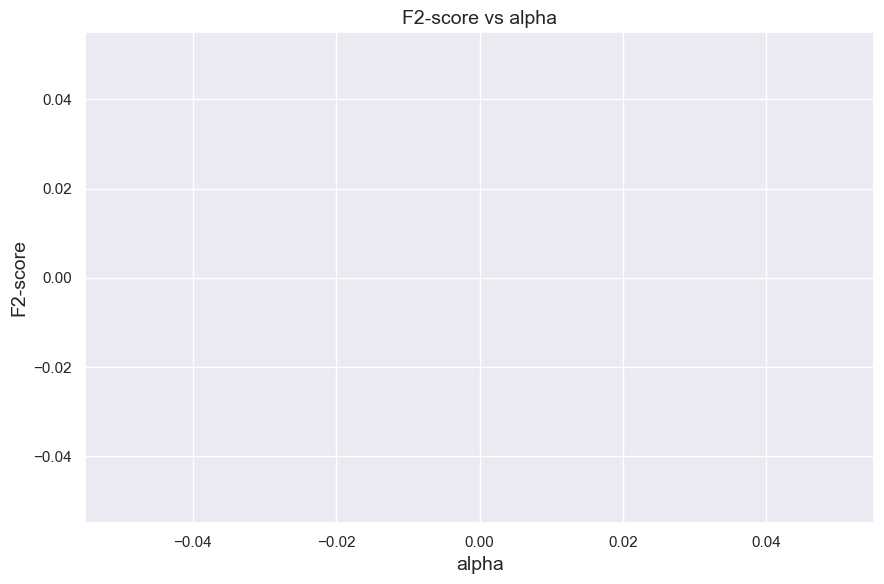

In [32]:
# Plotting F2-score over alpha
plt.figure(figsize = (9, 6))
plt.plot(alpha_list, f2_list)
plt.xlabel("alpha", fontsize = 14)
plt.ylabel("F2-score", fontsize = 14)
plt.title("F2-score vs alpha", fontsize = 14)
plt.tight_layout()
plt.show()

In [33]:
# Tuning summary
print(pd.Series({
    "Optimal alpha": alpha_opt,
    "Optimal F2-score": f2_score(y_val, y_val_pred_opt)
}).to_string())

Optimal alpha       0.0
Optimal F2-score    0.0


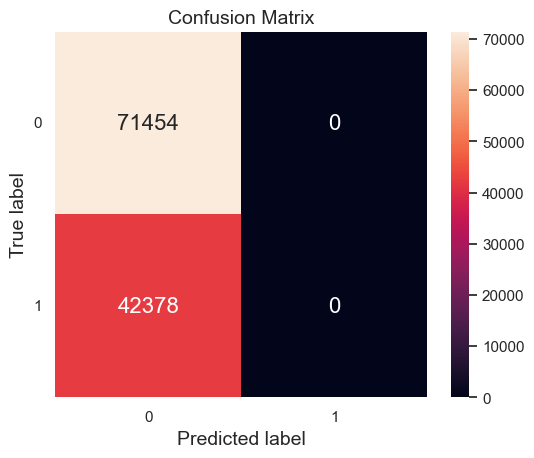

In [34]:
# Confusion matrix for predictions on the validation set
conf_mat_heatmap(y_val, y_val_pred_opt)

In [ ]:
# PREDICTION AND EVALUATION ON TEST SET

In [35]:
# Function to compute and print evaluation metrics
def evaluation(y_test, y_pred):
    confusion_mat = conf_mat(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]
    print(pd.Series({
        "Accuracy": (tp + tn) / (tn + fp + fn + tp),
        "Precision": tp / (tp + fp),
        "Recall": tp / (tp + fn),
        "F1-score": (2 * tp) / ((2 * tp) + fn + fp),
        "F2-score": (5 * tp) / ((5 * tp) + (4 * fn) + fp),
        "MCC": ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    }).to_string())

In [36]:
# Prediction and evaluation on the test set
y_test_normal = model_normal(X_test_fs, epsilon = alpha_opt**X_test_fs.shape[1])
evaluation(y_test, y_test_normal)

AssertionError: Length of mean vector does not match length of input vector

In [37]:
# Confusion matrix for predictions on the test set
conf_mat_heatmap(y_test, y_test_normal)

NameError: name 'y_test_normal' is not defined

In [ ]:
# Runtime and memory usage
stop = time.time()
print(pd.Series({"Process runtime": "{:.2f} seconds".format(float(stop - start)),
                 "Process memory usage": "{:.2f} MB".format(float(process.memory_info()[0]/(1024*1024)))}).to_string())